#  2.1 AutoML con Pycaret
### Clasificacion del uso de la tarjeta de crédito

In [1]:
#!pip install pycaret

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

from pycaret.classification import *

# Obtención de los datos

In [3]:
df = pd.read_csv("../data/adult.csv")
print("Filas dataset:", len(df))
df.head()

Filas dataset: 48842


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
#train_df = df.sample(frac=0.8, random_state=0)
#test_df = df.drop(train_df.index)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)

train_df.reset_index(inplace=True, drop=True)
test_df.reset_index(inplace=True, drop=True)

print("Filas train:", len(train_df))
print("Filas valid:", len(test_df))

Filas train: 39073
Filas valid: 9769


# Preprocesamiento de los datos

In [5]:
experiment = setup(data   = train_df,
                   target = 'income',
                   session_id=123) 

,Description,Value
0,session_id,123
1,Target,income
2,Target Type,Binary
3,Label Encoded,"<=50K: 0, >50K: 1"
4,Original Data,"(39073, 15)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


# Comparación de modelos
### Y seccionea los 10 mejores

In [6]:
%%time
#best_model = compare_models(n_select = 1)
top10 = compare_models(n_select = 10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8745,0.9286,0.7963,0.8699,0.8701,0.6307,0.6356,5.0860
lightgbm,Light Gradient Boosting Machine,0.8743,0.9278,0.7969,0.8697,0.8700,0.6308,0.6354,0.0960
xgboost,Extreme Gradient Boosting,0.8721,0.9269,0.7944,0.8674,0.8679,0.6248,0.6292,2.0000
gbc,Gradient Boosting Classifier,0.8655,0.9182,0.7657,0.8603,0.8573,0.5883,0.6010,1.0220
ada,Ada Boost Classifier,0.8615,0.9130,0.7746,0.8556,0.8559,0.5892,0.5950,0.2860
rf,Random Forest Classifier,0.8563,0.9023,0.7725,0.8504,0.8515,0.5784,0.5825,0.9990
lda,Linear Discriminant Analysis,0.8417,0.8931,0.7430,0.8334,0.8344,0.5262,0.5329,0.3230
ridge,Ridge Classifier,0.8404,0.0000,0.7215,0.8315,0.8282,0.5010,0.5174,0.0540
et,Extra Trees Classifier,0.8349,0.8771,0.7513,0.8291,0.8311,0.5240,0.5259,1.4400
dt,Decision Tree Classifier,0.8110,0.7427,0.7427,0.8125,0.8117,0.4817,0.4818,0.0880


CPU times: user 37 s, sys: 2.03 s, total: 39.1 s
Wall time: 2min 28s


# Optimización de hiperparámateros de los 10 mejores

In [7]:
# tune top 10 base models
# tuned_top10 = [tune_model(model) for model in top10]

# Ensemble

In [8]:
%%time
# bagged_top10 = [ensemble_model(i) for i in top10] # tuned_top10

In [ ]:
%%time
# blender = blend_models(estimator_list = top10) 

In [11]:
%%time
#stacking = stack_models(estimator_list = top10, meta_model     = create_model('xgboost'))

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 19.6 µs


# Ver modelos disponibles para entrenar en PyCaret

In [12]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### Decision Tree Classifier

In [8]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7343,0.6257,0.6257,0.7420,0.7380,0.2444,0.2447
1,0.7325,0.6277,0.6266,0.7421,0.7369,0.2443,0.2448
2,0.7431,0.6282,0.6282,0.7452,0.7441,0.2544,0.2544
3,0.7274,0.6151,0.6151,0.7350,0.7310,0.2240,0.2242
4,0.7187,0.6054,0.6054,0.7282,0.7231,0.2038,0.2042
5,0.7187,0.6014,0.6002,0.7253,0.7218,0.1958,0.1960
6,0.7206,0.6128,0.6128,0.7326,0.7261,0.2162,0.2168
7,0.7331,0.5986,0.5991,0.7276,0.7302,0.2024,0.2026
8,0.7206,0.6045,0.6045,0.7280,0.7241,0.2036,0.2038
9,0.7442,0.6272,0.6272,0.7453,0.7447,0.2533,0.2533


In [9]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### Neighbors Classifier

In [14]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7469,0.6020,0.5471,0.7022,0.7169,0.1128,0.1204
1,0.7550,0.5894,0.5585,0.7131,0.7257,0.1402,0.1500
2,0.7506,0.5883,0.5371,0.6971,0.7128,0.0923,0.1024
3,0.7419,0.5818,0.5294,0.6878,0.7057,0.0723,0.0790
4,0.7563,0.5908,0.5376,0.7005,0.7148,0.0954,0.1085
5,0.7550,0.5997,0.5461,0.7055,0.7193,0.1139,0.1255
6,0.7638,0.5890,0.5569,0.7175,0.7282,0.1413,0.1565
7,0.7613,0.6240,0.5460,0.7094,0.7213,0.1163,0.1318
8,0.7619,0.5988,0.5546,0.7150,0.7264,0.1356,0.1500
9,0.7549,0.5756,0.5511,0.7088,0.7223,0.1246,0.1351


### Random Forest Classifier

In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8133,0.7673,0.6504,0.7935,0.7934,0.3551,0.3749
1,0.8239,0.7615,0.6635,0.8075,0.8043,0.3882,0.4117
2,0.8258,0.7708,0.6533,0.8110,0.8018,0.3756,0.4098
3,0.8177,0.7605,0.6574,0.7993,0.7984,0.3710,0.3913
4,0.8208,0.7642,0.6594,0.8033,0.8010,0.3780,0.4006
5,0.8283,0.7638,0.6724,0.8133,0.8100,0.4070,0.4297
6,0.8127,0.7647,0.6490,0.7926,0.7925,0.3522,0.3721
7,0.8283,0.7390,0.6580,0.8145,0.8050,0.3861,0.4202
8,0.8108,0.7496,0.6488,0.7905,0.7913,0.3496,0.3678
9,0.8176,0.7565,0.6534,0.7988,0.7971,0.3645,0.3867


# Optimización del modelo

### 9.1 Decision Tree Classifier

In [15]:
#tuned_dt = tune_model(dt)

### 9.2 K Neighbors Classifier

In [14]:
#import numpy as np
#tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

### Random Forest Classifier

In [13]:
#tuned_rf = tune_model(rf)

# Visualización de los resultados del modelo

In [17]:
my_model = top10[0]
my_model

###  AUC Plot

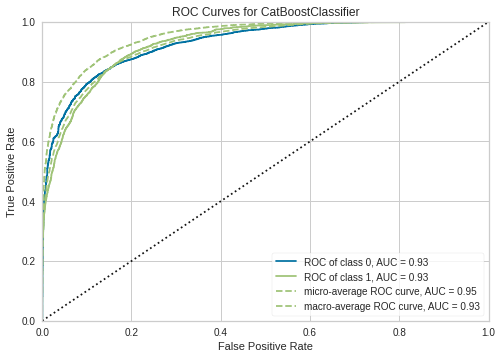

In [18]:
plot_model(my_model, plot='auc')

### Precision-Recall Curve

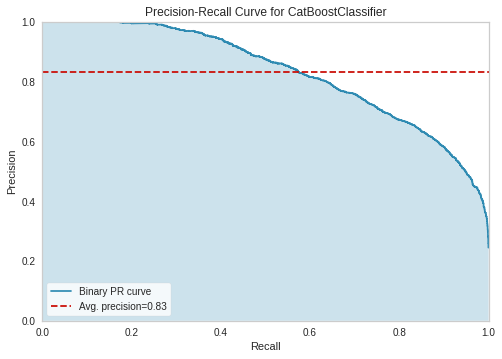

In [19]:
plot_model(my_model, plot = 'pr')

### Distribución de factores importantes

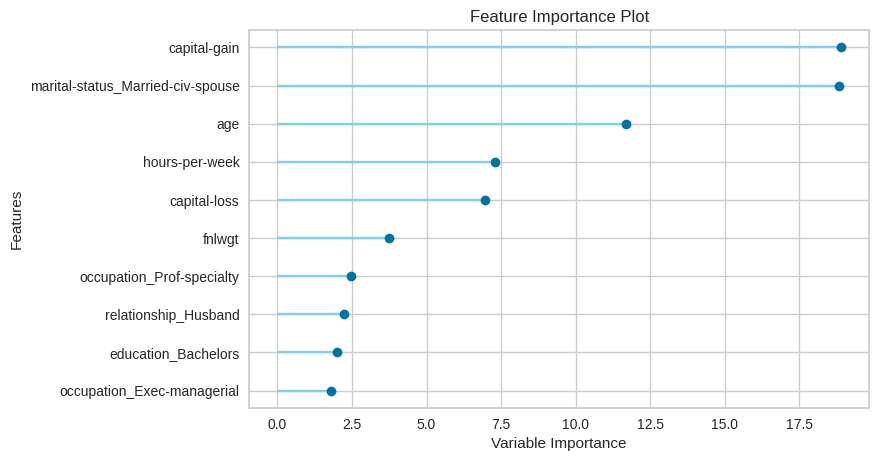

In [20]:
plot_model(my_model, plot='feature')

### Matriz de confusión

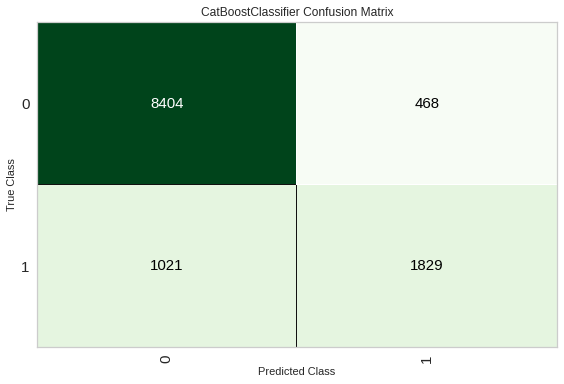

In [21]:
plot_model(my_model, plot='confusion_matrix')

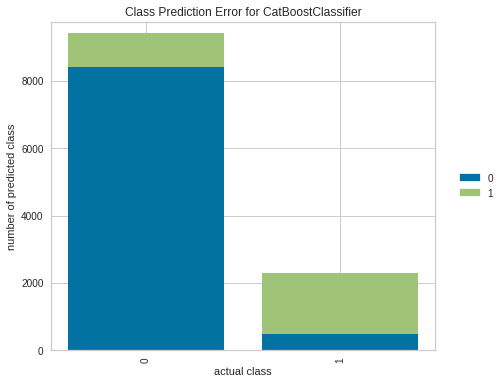

In [22]:
plot_model(my_model, plot='error')

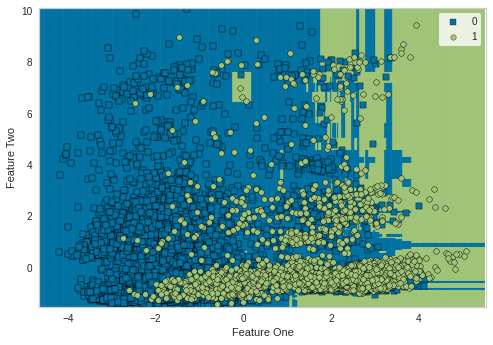

CPU times: user 15.6 s, sys: 2.18 s, total: 17.7 s
Wall time: 5.65 s


In [23]:
%%time
plot_model(my_model, plot='boundary')

In [24]:
#evaluate_model(my_model)

# Predicción (holdout set)

In [25]:
predict_model(my_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8730,0.9288,0.7945,0.8685,0.8681,0.6305,0.6365


# Predicción (test set)
### Balanced accuracy = 79.66%

In [26]:
tmp_df = predict_model(my_model, data=test_df)

y_true = tmp_df["income"].values
y_pred = tmp_df["Label"].values

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_true, y_pred)

0.7966166711991912

# Finalización del modelo (entrenarlo con todos los datos)

In [28]:
%%time
final_model = finalize_model(my_model)
print(final_model)

CPU times: user 17.4 s, sys: 1.45 s, total: 18.9 s
Wall time: 1min 9s


# Predicción (test set)
### Balanced accuracy = 79.71%

In [29]:
preds_test_df = predict_model(final_model, data=test_df)
preds_test_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Label,Score
0,36,Private,65624,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K,<=50K,0.8896
1,57,Self-emp-inc,37345,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,36,United-States,>50K,>50K,0.8856
2,49,Private,287647,Masters,14,Divorced,Sales,Not-in-family,White,Male,4787,0,45,United-States,>50K,>50K,0.9082
3,54,Self-emp-not-inc,183668,5th-6th,3,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,55,United-States,<=50K,<=50K,0.8418
4,17,Self-emp-not-inc,228786,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,24,United-States,<=50K,<=50K,0.9996


In [30]:
y_true = preds_test_df["income"].values
y_pred = preds_test_df["Label"].values

In [31]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_true, y_pred)

0.7971878553585342

# Guardar el modelo

In [29]:
save_model(final_model, 'Final Model PyCaret - Adult dataset')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='income',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='income')),
                 ('fix_perfect', Remove_100(target='income')),
                 ('clean_names', 

# Cargar el modelo guardado

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [30]:
saved_final_model = load_model('Final Model PyCaret - Adult dataset')

Transformation Pipeline and Model Successfully Loaded


In [31]:
new_prediction = predict_model(saved_final_model, data=test_df)

In [32]:
new_prediction.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Label,Score
0,36,Private,65624,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K,<=50K,0.8896
1,57,Self-emp-inc,37345,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,36,United-States,>50K,>50K,0.8856
2,49,Private,287647,Masters,14,Divorced,Sales,Not-in-family,White,Male,4787,0,45,United-States,>50K,>50K,0.9082
3,54,Self-emp-not-inc,183668,5th-6th,3,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,55,United-States,<=50K,<=50K,0.8418
4,17,Self-emp-not-inc,228786,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,24,United-States,<=50K,<=50K,0.9996
